# Multi-Label Prediction Using a Fused CNN


In [255]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from keras.preprocessing import image
from keras.applications.densenet import DenseNet121
import numpy as np
from PIL import Image
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import *
import tqdm
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.utils import plot_model
from keras.optimizers import Adam
import pydot
import os

In [301]:
train = pd.read_csv('MRNet.csv', usecols = [0,1,2])

In [302]:
train.head()

,ID,Meniscus,ACL
0,0,0,0
1,1,1,1
2,2,0,0
3,3,1,0
4,4,0,0


In [303]:
saggital_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Unfiltered Data/sagittal/' + str(train['ID'][i]) + '.jpg', target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    saggital_image.append(img)
X = np.array(saggital_image)

100%|██████████| 1250/1250 [00:01<00:00, 743.84it/s]


In [304]:
axial_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Unfiltered Data/axial/' + str(train['ID'][i]) + '.jpg', target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    axial_image.append(img)
Y = np.array(axial_image)

100%|██████████| 1250/1250 [00:01<00:00, 802.12it/s]


In [305]:
coronal_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Unfiltered Data/coronal/' + str(train['ID'][i]) + '.jpg', target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    coronal_image.append(img)
Z = np.array(coronal_image)

100%|██████████| 1250/1250 [00:01<00:00, 852.60it/s]


In [306]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(1250, 256, 256, 3)
(1250, 256, 256, 3)
(1250, 256, 256, 3)


In [307]:
y = np.array(train.drop(['ID'], axis=1))
y.shape

(1250, 2)

In [308]:
x_train_comp = np.stack((X,Y,Z), axis = 3)

In [309]:
x_train_comp.shape

(1250, 256, 256, 3, 3)

In [310]:
x_train, x_test, y_train, y_test = train_test_split(x_train_comp, train, test_size = 0.1, random_state = 69)

In [311]:
x_train_sag = x_train[:,:,:,:,0]
x_test_sag = x_test[:,:,:,:,0]

x_train_axi = x_train[:,:,:,:,1]
x_test_axi = x_test[:,:,:,:,1]

x_train_cor = x_train[:,:,:,:,2]
x_test_cor = x_test[:,:,:,:,2]

In [312]:
#new model
input_sagittal = keras.Input(shape = (256,256,3))
input_axial = keras.Input(shape = (256,256,3))
input_coronal = keras.Input(shape = (256,256,3))

#first model
x = Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_sagittal)
x1 = MaxPooling2D(pool_size=(2, 2))(x)
x2 = Dropout(0.25)(x1)
x3 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu')(x2)
x4 = MaxPooling2D(pool_size=(2, 2))(x3)
x5 = Dropout(0.25)(x4)
x6 = Conv2D(filters=64, kernel_size=(5, 5), activation="relu")(x5)
x7 = MaxPooling2D(pool_size=(2, 2))(x6)
x8 = Dropout(0.25)(x7)
x9 = Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(x8)
x10 = MaxPooling2D(pool_size=(2, 2))(x9)
x11 = Dropout(0.25)(x10)
x12 = Flatten()(x11)
x13 = Dense(128, activation='relu')(x12)
x14 = Dropout(0.5)(x13)
x15 = Dense(64, activation='relu')(x14)
x16 = Dropout(0.5)(x15)
x17 = Dense(10, activation='sigmoid')(x16)
x_final = Model(inputs=input_sagittal, outputs = x17)

#second model
y = Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_axial)
y1 = MaxPooling2D(pool_size=(2, 2))(y)
y2 = Dropout(0.25)(y1)
y3 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu')(y2)
y4 = MaxPooling2D(pool_size=(2, 2))(y3)
y5 = Dropout(0.25)(y4)
y6 = Conv2D(filters=64, kernel_size=(5, 5), activation="relu")(y5)
y7 = MaxPooling2D(pool_size=(2, 2))(y6)
y8 = Dropout(0.25)(y7)
y9 = Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(y8)
y10 = MaxPooling2D(pool_size=(2, 2))(y9)
y11 = Dropout(0.25)(y10)
y12 = Flatten()(y11)
y13 = Dense(128, activation='relu')(y12)
y14 = Dropout(0.5)(y13)
y15 = Dense(64, activation='relu')(y14)
y16 = Dropout(0.5)(y15)
y17 = Dense(10, activation='sigmoid')(y16)
y_final = Model(inputs=input_axial, outputs = y17)

#third model
z = Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_coronal)
z1 = MaxPooling2D(pool_size=(2, 2))(z)
z2 = Dropout(0.25)(z1)
z3 = Conv2D(filters=32, kernel_size=(5, 5), activation='relu')(z2)
z4 = MaxPooling2D(pool_size=(2, 2))(z3)
z5 = Dropout(0.25)(z4)
z6 = Conv2D(filters=64, kernel_size=(5, 5), activation="relu")(z5)
z7 = MaxPooling2D(pool_size=(2, 2))(z6)
z8 = Dropout(0.25)(z7)
z9 = Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(z8)
z10 = MaxPooling2D(pool_size=(2, 2))(z9)
z11 = Dropout(0.25)(z10)
z12 = Flatten()(z11)
z13 = Dense(128, activation='relu')(z12)
z14 = Dropout(0.5)(z13)
z15 = Dense(64, activation='relu')(z14)
z16 = Dropout(0.5)(z15)
z17 = Dense(10, activation='sigmoid')(z16)
z_final = Model(inputs=input_coronal, outputs = z17)

combined = concatenate([x_final.output, y_final.output, z_final.output])

q = Dense(10, activation = 'relu')(combined)
q1 = Dense(1, activation = 'softmax')(q)

model = Model(inputs = [x_final.input, y_final.input, z_final.input], outputs = q1)

In [267]:
input_sagittal = keras.Input(shape = (256,256,3))
input_axial = keras.Input(shape = (256,256,3))
input_coronal = keras.Input(shape = (256, 256,3))

#first model
x = Conv2D(filters=8, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_sagittal)
x1 = Dense(10, activation = 'relu')(x)
x2= Conv2D(filters=8, kernel_size=(5, 5), activation="relu")(x1)
x3 = Dropout(0.5)(x2)
x4= Dropout(0.5)(x3)
x5 = Flatten()(x4)
x_final = Model(inputs=input_sagittal, outputs = x5)

#second model
y = Conv2D(filters=8, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_axial)
y1 = Dense(10, activation = 'relu')(y)
y2= Conv2D(filters=8, kernel_size=(5, 5), activation="relu")(y1)
y3 = Dropout(0.5)(y2)
y4= Dropout(0.5)(y3)
y5 = Flatten()(y4)
y_final = Model(inputs=input_axial, outputs = y5)

#third model
z = Conv2D(filters=8, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3))(input_coronal)
z1 = Dense(10, activation = 'relu')(z)
z2 = Conv2D(filters=8, kernel_size=(5, 5), activation="relu")(z1)
z3 = Dropout(0.5)(z2)
z4 = Dropout(0.5)(z3)
z5 = Flatten()(z4)
z_final = Model(inputs=input_coronal, outputs = z5)

combined = concatenate([x_final.output, y_final.output, z_final.output])

q1 = Dense(10, activation = 'relu')(combined)
q2 = Flatten()(q1)
q3 = Dense(2, activation = 'softmax')(q2)

model = Model(inputs = [x_final.input, y_final.input, z_final.input], outputs = q3)

In [313]:
model.summary()

Model: "functional_246"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_92 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_93 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_213 (Conv2D)             (None, 252, 252, 16) 1216        input_91[0][0]                   
_____________________________________________________________________________________

In [212]:
keras.utils.model_to_dot(model, show_shapes = True, show_layer_names = True)

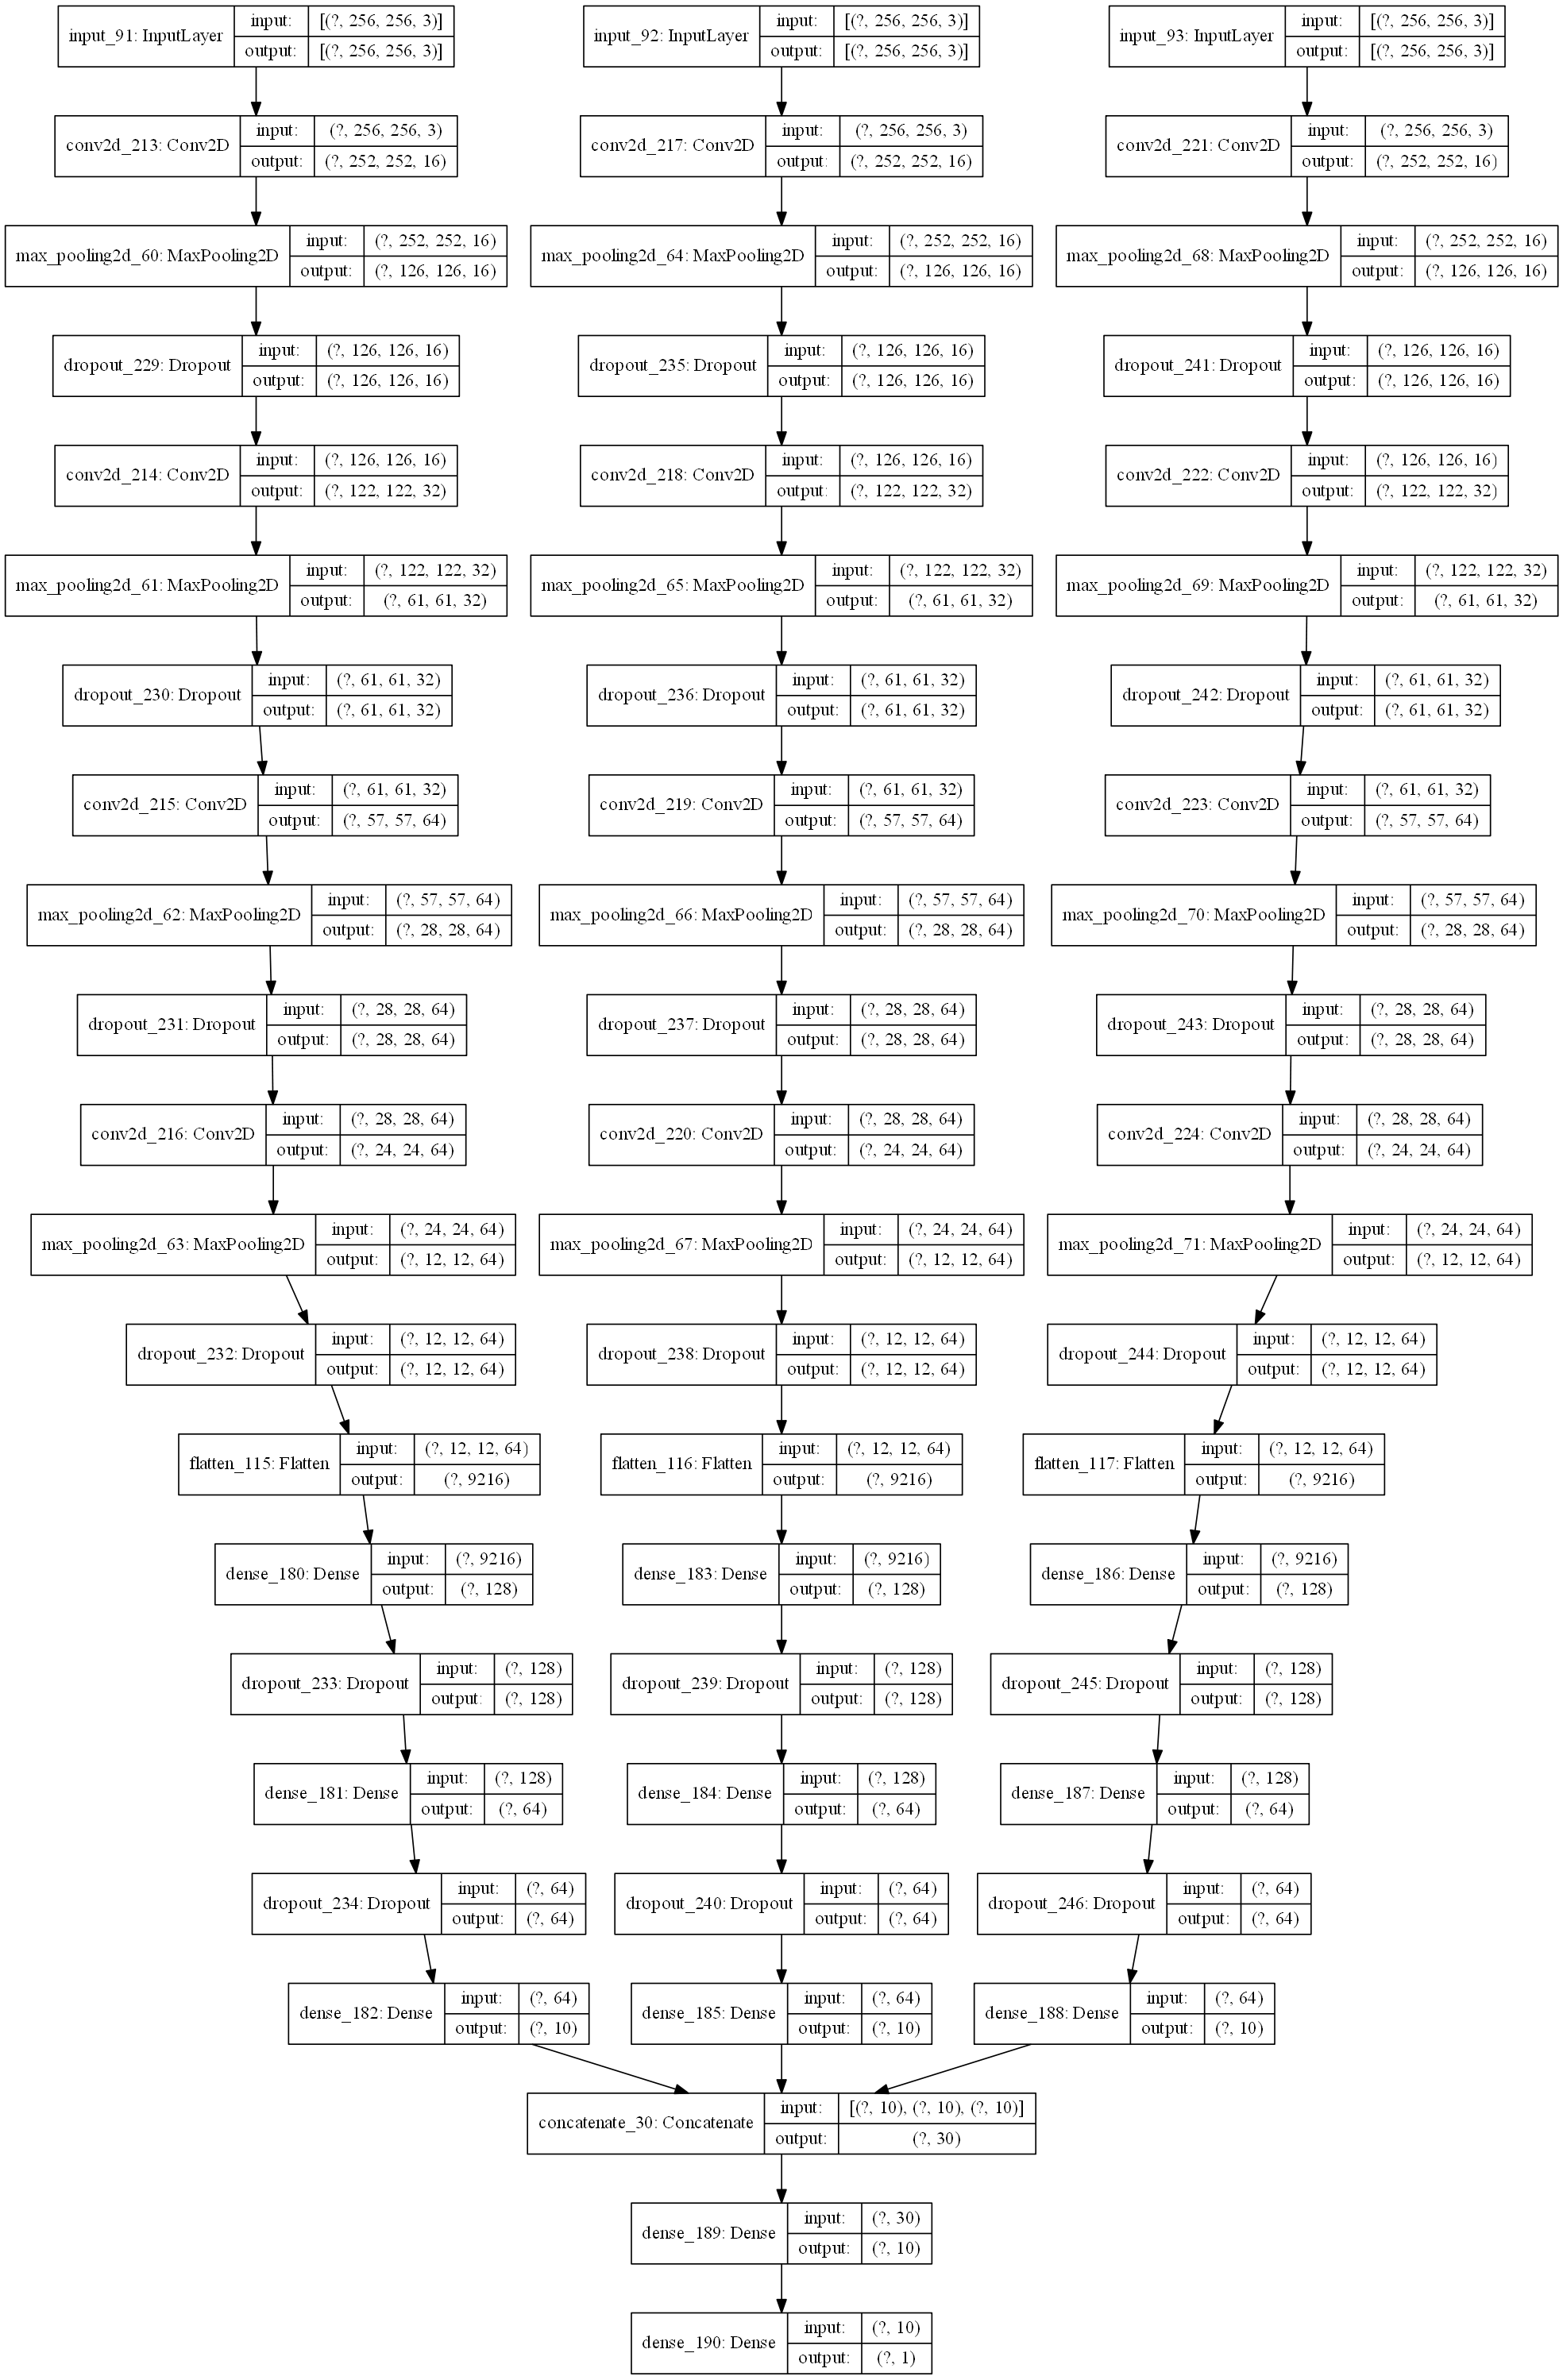

In [314]:
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, dpi = 120)

In [315]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [316]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [317]:
y_train = np.array(y_train.drop(['ID'], axis=1))
y_test = np.array(y_test.drop(['ID'], axis=1))
y_train.shape
y_test.shape

(125, 2)

In [318]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [319]:
model.fit([x_train_sag,x_train_axi,x_train_cor],
          y_train, 
          batch_size=10,
          epochs=5, 
          verbose = 1,
          validation_data = ([x_test_sag, x_test_axi, x_test_cor], y_test)
          )

Epoch 1/5
113/113 [==============================] - 83s 735ms/step - loss: 10.8507 - accuracy: 0.2884 - val_loss: 11.4674 - val_accuracy: 0.2480
Epoch 2/5
 16/113 [===>..........................] - ETA: 1:03 - loss: 11.0080 - accuracy: 0.2781

KeyboardInterrupt: 